***Daniel Recep Yildirim\
(2056569)***

**PART 1.1 Warming up:**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.1.1  Use feature extraction with the VGG16 classifier**

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar100.load_data()

# Preprocess the data
x_train_full = preprocess_input(x_train_full.astype(np.float32))
x_test = preprocess_input(x_test.astype(np.float32))
y_train_full = to_categorical(y_train_full, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [15]:
x_train.shape

(40000, 32, 32, 3)

In [16]:
x_val.shape

(10000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [20]:
# Extract features using the VGG16 model
def get_features_and_labels(images, labels, batch_size=32):
    all_features = []
    all_labels = []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size]
        preprocessed_images = preprocess_input(batch_images.astype(np.float32))
        features = base_model.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels[i:i + batch_size])
    return np.concatenate(all_features), np.concatenate(all_labels)

# Get features and labels for training, validation, and test datasets
train_features, train_labels = get_features_and_labels(x_train, y_train)
val_features, val_labels = get_features_and_labels(x_val, y_val)
test_features, test_labels = get_features_and_labels(x_test, y_test)

1/1 [==============================] - 0s 18ms/step


In [21]:
Architecture_1 = [
    Flatten(input_shape=train_features.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
]

Architecture_2 = [
    Flatten(input_shape=train_features.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(100, activation='softmax')
]

Architecture_3 = [
    Flatten(input_shape=train_features.shape[1:]),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(100, activation='softmax')
]

In [22]:
model_architectures = [
    Architecture_1,
    Architecture_2,
    Architecture_3
]

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

Epoch 1/20
625/625 [==============================] - 3s 3ms/step - loss: 4.2328 - accuracy: 0.1180 - val_loss: 3.6019 - val_accuracy: 0.1746
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 3.3189 - accuracy: 0.2145 - val_loss: 3.3384 - val_accuracy: 0.2200
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 3.0131 - accuracy: 0.2580 - val_loss: 3.3146 - val_accuracy: 0.2306
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 2.8338 - accuracy: 0.2904 - val_loss: 3.3175 - val_accuracy: 0.2354
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 2.7074 - accuracy: 0.3142 - val_loss: 3.4745 - val_accuracy: 0.2461
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 2.5938 - accuracy: 0.3390 - val_loss: 3.4696 - val_accuracy: 0.2382
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 2.4996 - accuracy: 0.3578 - val_loss: 3.7017 - val_accuracy: 0.2492
Epoch 

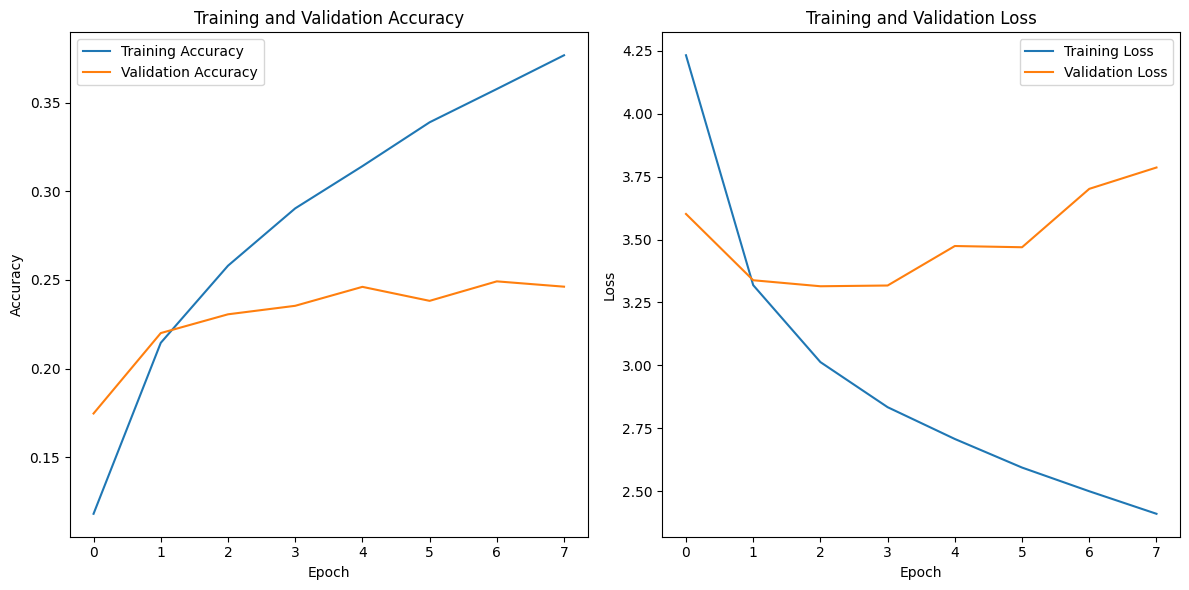

Epoch 1/20
625/625 [==============================] - 4s 3ms/step - loss: 3.9694 - accuracy: 0.1191 - val_loss: 3.3957 - val_accuracy: 0.1955
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 3.1237 - accuracy: 0.2393 - val_loss: 3.1222 - val_accuracy: 0.2481
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 2.8193 - accuracy: 0.2936 - val_loss: 3.0305 - val_accuracy: 0.2663
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 2.6230 - accuracy: 0.3279 - val_loss: 3.0188 - val_accuracy: 0.2728
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 2.4573 - accuracy: 0.3638 - val_loss: 3.0577 - val_accuracy: 0.2795
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 2.3228 - accuracy: 0.3905 - val_loss: 3.0901 - val_accuracy: 0.2888
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 2.2067 - accuracy: 0.4158 - val_loss: 3.1480 - val_accuracy: 0.2920
Epoch 

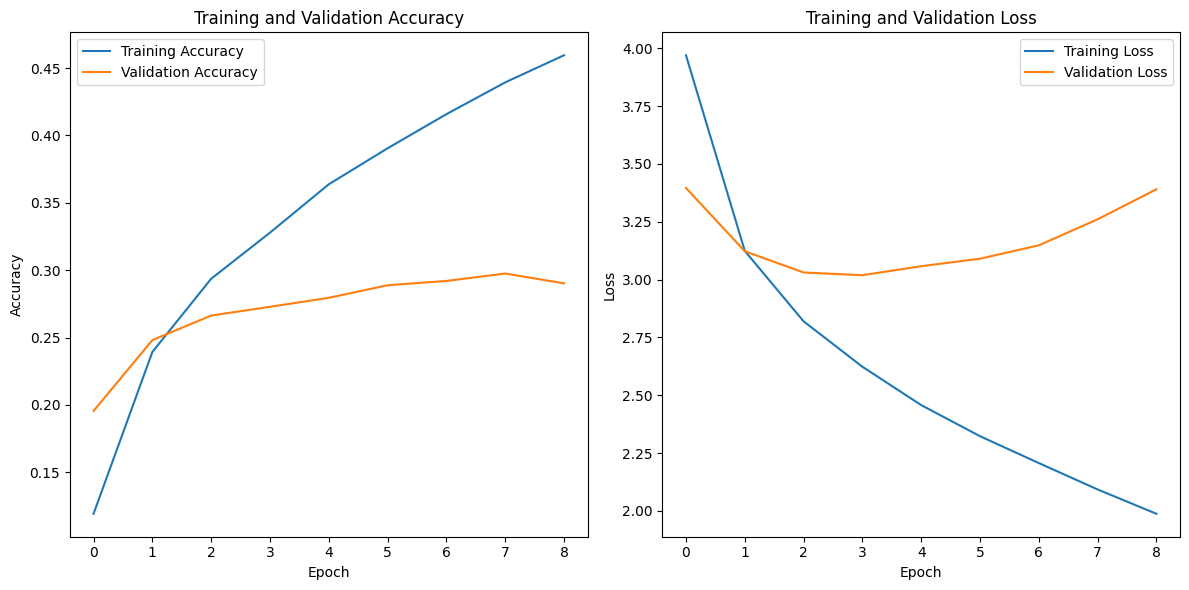

Epoch 1/20
625/625 [==============================] - 4s 4ms/step - loss: 3.8666 - accuracy: 0.1345 - val_loss: 3.2598 - val_accuracy: 0.2121
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 3.0333 - accuracy: 0.2553 - val_loss: 3.0176 - val_accuracy: 0.2654
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 2.7149 - accuracy: 0.3162 - val_loss: 2.9400 - val_accuracy: 0.2814
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 2.4783 - accuracy: 0.3641 - val_loss: 2.9333 - val_accuracy: 0.3080
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 2.2657 - accuracy: 0.4077 - val_loss: 3.0114 - val_accuracy: 0.3052
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 2.0765 - accuracy: 0.4463 - val_loss: 3.1077 - val_accuracy: 0.3035
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 1.9031 - accuracy: 0.4838 - val_loss: 3.2061 - val_accuracy: 0.3078
Epoch 

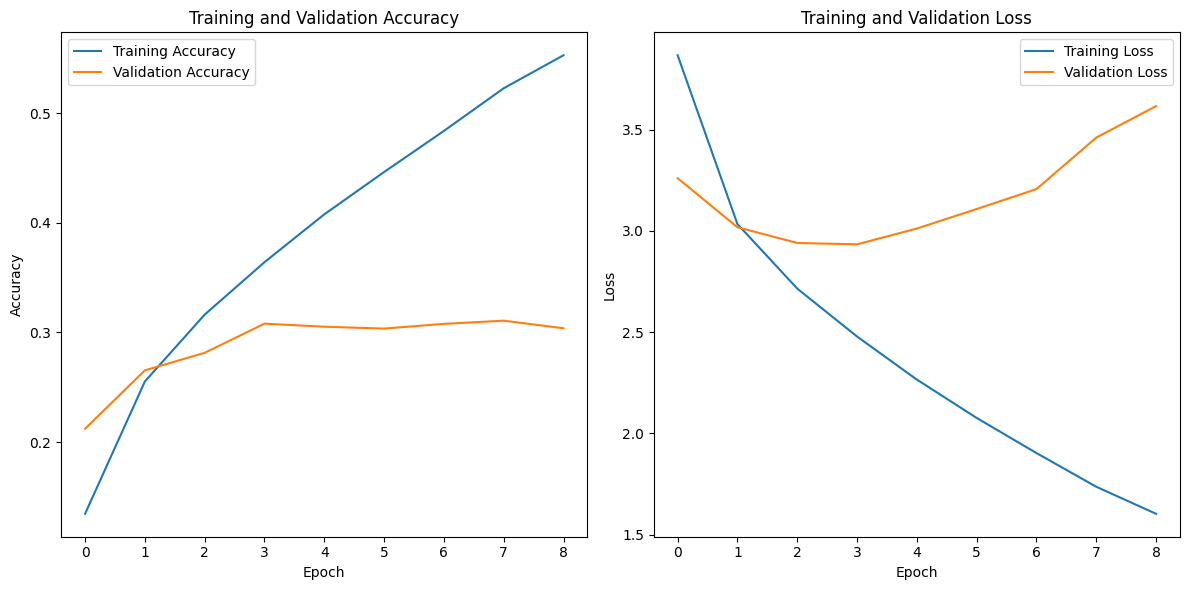

In [24]:
for architecture in model_architectures:
    model = Sequential(architecture)

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_features, train_labels, batch_size=64, epochs=20, validation_data=(val_features, val_labels),
                        callbacks=[early_stopping, model_checkpoint])

    # Evaluate the model on the test data
    model = keras.models.load_model("best_model.h5")
    test_loss, test_acc = model.evaluate(test_features, test_labels)

    # Visualize training and validation accuracy and loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Add space between plots and the test accuracy output
    plt.subplots_adjust(wspace=0.5)  # You can adjust the spacing as needed

    # Display the test accuracy
    print(f"Test accuracy for this architecture: {test_acc}")

    plt.tight_layout()
    plt.show()

**1.1.2 Fine-tune the upper block of the convolutional base of the VGG16 network**

Epoch 1/20
625/625 [==============================] - 4s 4ms/step - loss: 3.8316 - accuracy: 0.1340 - val_loss: 3.2650 - val_accuracy: 0.2129
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 3.0418 - accuracy: 0.2512 - val_loss: 3.1029 - val_accuracy: 0.2508
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 2.7523 - accuracy: 0.3068 - val_loss: 2.9872 - val_accuracy: 0.2815
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 2.5293 - accuracy: 0.3502 - val_loss: 2.9975 - val_accuracy: 0.2893
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 2.3181 - accuracy: 0.3914 - val_loss: 3.0101 - val_accuracy: 0.2993
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 2.1358 - accuracy: 0.4311 - val_loss: 3.1998 - val_accuracy: 0.3009
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 1.9649 - accuracy: 0.4663 - val_loss: 3.3160 - val_accuracy: 0.2991
Epoch 

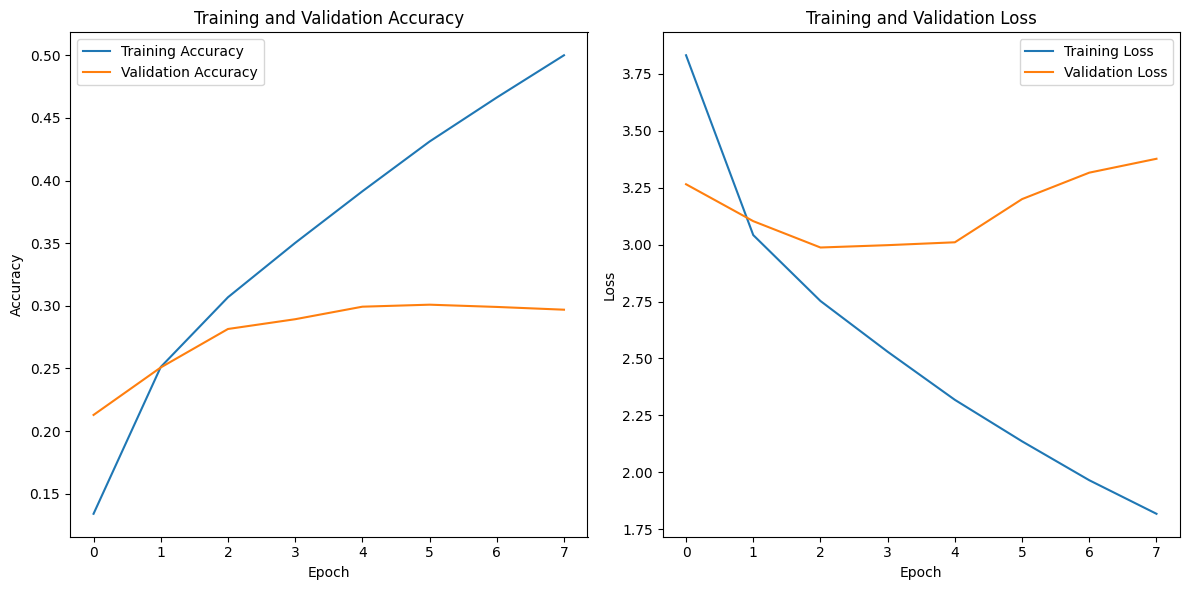

In [25]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


# Freeze layers in the lower block of the base model
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add your own classification layers on top of the conv_base
inputs = Input(shape=train_features.shape[1:])
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=inputs, outputs=output)

# Compile the model with RMSprop optimizer and lower learning rate
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Fine-tune the model using train_features
history = model.fit(train_features, train_labels, batch_size=64, epochs=20, validation_data=(val_features, val_labels), callbacks=[early_stopping,callbacks])

# Evaluate the model on the test data
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
625/625 [==============================] - 4s 4ms/step - loss: 3.7803 - accuracy: 0.1393 - val_loss: 3.2541 - val_accuracy: 0.2170
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 3.0233 - accuracy: 0.2597 - val_loss: 3.0617 - val_accuracy: 0.2564
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 2.7288 - accuracy: 0.3157 - val_loss: 3.0175 - val_accuracy: 0.2852
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 2.4937 - accuracy: 0.3596 - val_loss: 2.9899 - val_accuracy: 0.2915
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 2.2832 - accuracy: 0.4032 - val_loss: 3.0736 - val_accuracy: 0.2979
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 2.0926 - accuracy: 0.4415 - val_loss: 3.1754 - val_accuracy: 0.3007
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 1.9263 - accuracy: 0.4779 - val_loss: 3.3418 - val_accuracy: 0.3006
Epoch 

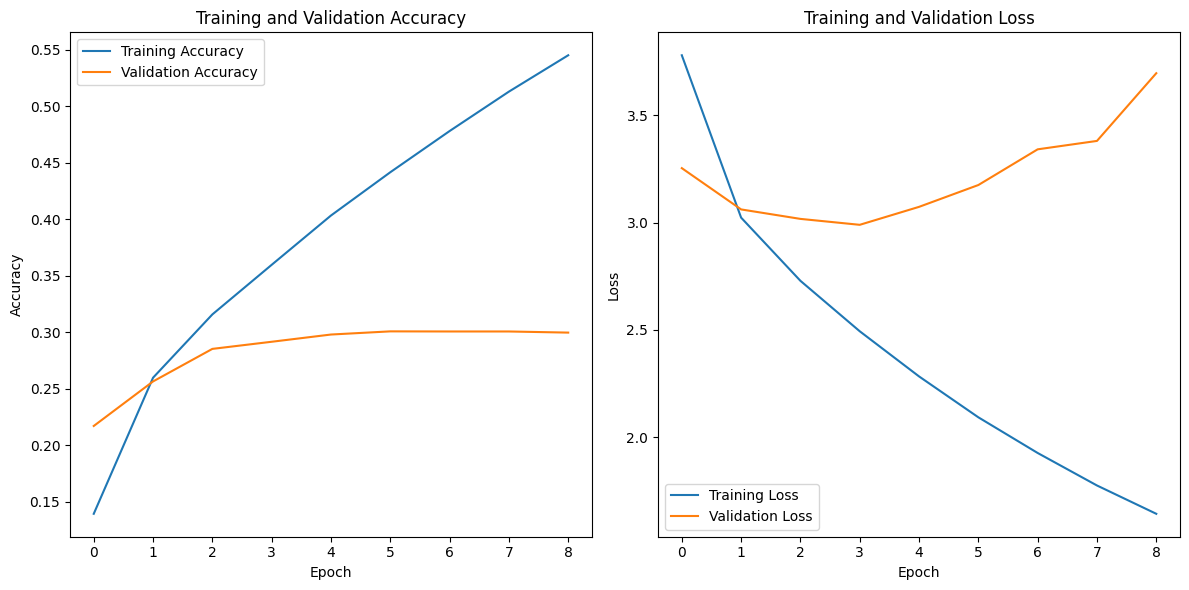

In [26]:
# Freeze layers in the lower block of the base model
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
] )

# Add your own classification layers on top of the conv_base
inputs = Input(shape=train_features.shape[1:])
x = data_augmentation(inputs)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=inputs, outputs=output)

# Compile the model with RMSprop optimizer and lower learning rate
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Fine-tune the model using train_features
history = model.fit(train_features, train_labels, batch_size=64, epochs=20, validation_data=(val_features, val_labels), callbacks=[early_stopping,callbacks])

# Evaluate the model on the test data
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
625/625 [==============================] - 5s 5ms/step - loss: 3.8948 - accuracy: 0.1262 - val_loss: 3.3019 - val_accuracy: 0.2045
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 3.0422 - accuracy: 0.2542 - val_loss: 3.0653 - val_accuracy: 0.2516
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 2.7245 - accuracy: 0.3106 - val_loss: 3.0179 - val_accuracy: 0.2754
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 2.4857 - accuracy: 0.3608 - val_loss: 2.9696 - val_accuracy: 0.2990
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 2.2813 - accuracy: 0.4008 - val_loss: 3.0521 - val_accuracy: 0.3001
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 2.0856 - accuracy: 0.4407 - val_loss: 3.1594 - val_accuracy: 0.2997
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 1.9167 - accuracy: 0.4787 - val_loss: 3.3005 - val_accuracy: 0.3083
Epoch 

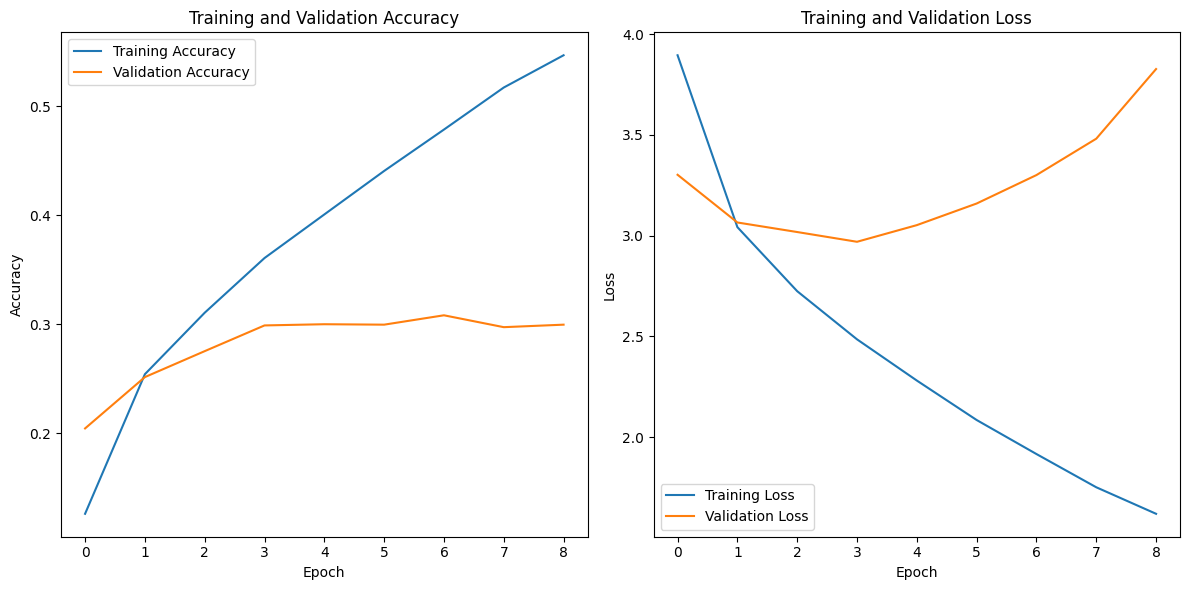

In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
] )

# Add your own classification layers on top of the conv_base
inputs = Input(shape=train_features.shape[1:])
x = data_augmentation(inputs)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=inputs, outputs=output)

# Make all layers trainable
for layer in model.layers:
    layer.trainable = True

# Compile the model with RMSprop optimizer and lower learning rate
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Fine-tune the model using train_features
history = model.fit(train_features, train_labels, batch_size=64, epochs=20, validation_data=(val_features, val_labels), callbacks=[early_stopping,callbacks])

# Evaluate the model on the test data
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#FROM SCRATCH

Epoch 1/100
619/625 [============================>.] - ETA: 0s - loss: 4.1159 - accuracy: 0.0721

625/625 [==============================] - 7s 9ms/step - loss: 4.1134 - accuracy: 0.0725 - val_loss: 3.7922 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 2/100
623/625 [============================>.] - ETA: 0s - loss: 3.5562 - accuracy: 0.1575

625/625 [==============================] - 4s 6ms/step - loss: 3.5549 - accuracy: 0.1579 - val_loss: 3.3579 - val_accuracy: 0.1948 - lr: 0.0010
Epoch 3/100
617/625 [============================>.] - ETA: 0s - loss: 3.1936 - accuracy: 0.2212

625/625 [==============================] - 4s 6ms/step - loss: 3.1912 - accuracy: 0.2215 - val_loss: 3.1563 - val_accuracy: 0.2383 - lr: 0.0010
Epoch 4/100
618/625 [============================>.] - ETA: 0s - loss: 2.9295 - accuracy: 0.2701

625/625 [==============================] - 4s 6ms/step - loss: 2.9291 - accuracy: 0.2702 - val_loss: 2.9219 - val_accuracy: 0.2748 - lr: 0.0010
Epoch 5/100
620/625 [============================>.] - ETA: 0s - loss: 2.7191 - accuracy: 0.3124

625/625 [==============================] - 4s 6ms/step - loss: 2.7176 - accuracy: 0.3126 - val_loss: 2.7339 - val_accuracy: 0.3109 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5339 - accuracy: 0.3496 - val_loss: 2.9043 - val_accuracy: 0.3005 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - ETA: 0s - loss: 2.3789 - accuracy: 0.3808

625/625 [==============================] - 4s 6ms/step - loss: 2.3789 - accuracy: 0.3808 - val_loss: 2.5705 - val_accuracy: 0.3499 - lr: 0.0010
Epoch 8/100
620/625 [============================>.] - ETA: 0s - loss: 2.2372 - accuracy: 0.4134

625/625 [==============================] - 4s 6ms/step - loss: 2.2372 - accuracy: 0.4135 - val_loss: 2.5048 - val_accuracy: 0.3711 - lr: 0.0010
Epoch 9/100
625/625 [==============================] - 3s 5ms/step - loss: 2.1092 - accuracy: 0.4406 - val_loss: 2.6177 - val_accuracy: 0.3504 - lr: 0.0010
Epoch 10/100
616/625 [============================>.] - ETA: 0s - loss: 1.9992 - accuracy: 0.4630

625/625 [==============================] - 4s 6ms/step - loss: 2.0001 - accuracy: 0.4629 - val_loss: 2.4893 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 11/100
618/625 [============================>.] - ETA: 0s - loss: 1.8885 - accuracy: 0.4887

625/625 [==============================] - 4s 6ms/step - loss: 1.8888 - accuracy: 0.4890 - val_loss: 2.4440 - val_accuracy: 0.3850 - lr: 0.0010
Epoch 12/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7807 - accuracy: 0.5141 - val_loss: 2.4999 - val_accuracy: 0.3807 - lr: 0.0010
Epoch 13/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6821 - accuracy: 0.5379 - val_loss: 2.5517 - val_accuracy: 0.3741 - lr: 0.0010
Epoch 14/100
625/625 [==============================] - 3s 4ms/step - loss: 1.5874 - accuracy: 0.5570 - val_loss: 2.6368 - val_accuracy: 0.3758 - lr: 0.0010
Epoch 15/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4951 - accuracy: 0.5785 - val_loss: 2.6018 - val_accuracy: 0.3782 - lr: 0.0010
Epoch 16/100
313/313 [==============================] - 1s 3ms/step - loss: 2.4310 - accuracy: 0.3814
Test accuracy: 0.3813999891281128


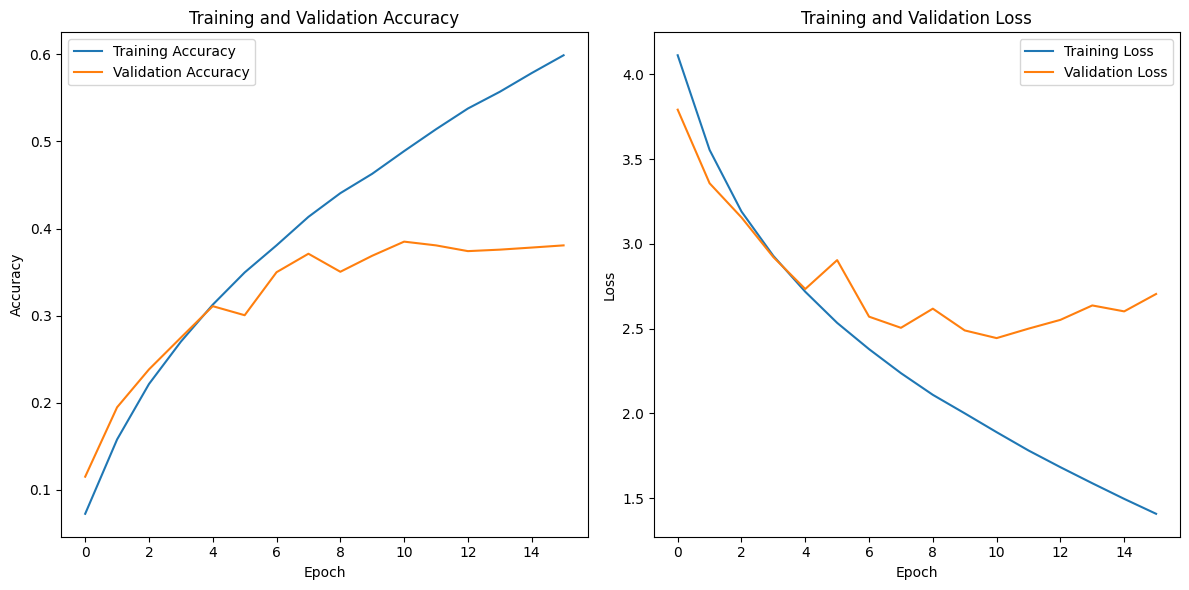

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#Model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 4.1410 - accuracy: 0.0679

625/625 [==============================] - 8s 10ms/step - loss: 4.1410 - accuracy: 0.0679 - val_loss: 3.7385 - val_accuracy: 0.1246 - lr: 0.0010
Epoch 2/100
617/625 [============================>.] - ETA: 0s - loss: 3.6712 - accuracy: 0.1337

625/625 [==============================] - 5s 9ms/step - loss: 3.6701 - accuracy: 0.1340 - val_loss: 3.5077 - val_accuracy: 0.1622 - lr: 0.0010
Epoch 3/100
619/625 [============================>.] - ETA: 0s - loss: 3.4097 - accuracy: 0.1789

625/625 [==============================] - 7s 11ms/step - loss: 3.4090 - accuracy: 0.1791 - val_loss: 3.2730 - val_accuracy: 0.2017 - lr: 0.0010
Epoch 4/100
615/625 [============================>.] - ETA: 0s - loss: 3.2308 - accuracy: 0.2141

625/625 [==============================] - 5s 9ms/step - loss: 3.2301 - accuracy: 0.2139 - val_loss: 3.1890 - val_accuracy: 0.2129 - lr: 0.0010
Epoch 5/100
624/625 [============================>.] - ETA: 0s - loss: 3.0981 - accuracy: 0.2393

625/625 [==============================] - 6s 9ms/step - loss: 3.0982 - accuracy: 0.2393 - val_loss: 2.9878 - val_accuracy: 0.2568 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 2.9992 - accuracy: 0.2580 - val_loss: 3.0036 - val_accuracy: 0.2649 - lr: 0.0010
Epoch 7/100
616/625 [============================>.] - ETA: 0s - loss: 2.9181 - accuracy: 0.2742

625/625 [==============================] - 5s 9ms/step - loss: 2.9165 - accuracy: 0.2748 - val_loss: 2.9097 - val_accuracy: 0.2784 - lr: 0.0010
Epoch 8/100
625/625 [==============================] - ETA: 0s - loss: 2.8345 - accuracy: 0.2898

625/625 [==============================] - 6s 9ms/step - loss: 2.8345 - accuracy: 0.2898 - val_loss: 2.7912 - val_accuracy: 0.3049 - lr: 0.0010
Epoch 9/100
614/625 [============================>.] - ETA: 0s - loss: 2.7654 - accuracy: 0.3014

625/625 [==============================] - 5s 9ms/step - loss: 2.7678 - accuracy: 0.3013 - val_loss: 2.7579 - val_accuracy: 0.3064 - lr: 0.0010
Epoch 10/100
621/625 [============================>.] - ETA: 0s - loss: 2.7068 - accuracy: 0.3158

625/625 [==============================] - 6s 9ms/step - loss: 2.7069 - accuracy: 0.3158 - val_loss: 2.7195 - val_accuracy: 0.3198 - lr: 0.0010
Epoch 11/100
616/625 [============================>.] - ETA: 0s - loss: 2.6519 - accuracy: 0.3251

625/625 [==============================] - 5s 9ms/step - loss: 2.6517 - accuracy: 0.3250 - val_loss: 2.6959 - val_accuracy: 0.3146 - lr: 0.0010
Epoch 12/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6012 - accuracy: 0.3351 - val_loss: 2.7376 - val_accuracy: 0.3274 - lr: 0.0010
Epoch 13/100
619/625 [============================>.] - ETA: 0s - loss: 2.5559 - accuracy: 0.3427

625/625 [==============================] - 6s 9ms/step - loss: 2.5559 - accuracy: 0.3426 - val_loss: 2.6812 - val_accuracy: 0.3296 - lr: 0.0010
Epoch 14/100
623/625 [============================>.] - ETA: 0s - loss: 2.5139 - accuracy: 0.3538

625/625 [==============================] - 5s 9ms/step - loss: 2.5148 - accuracy: 0.3537 - val_loss: 2.6056 - val_accuracy: 0.3410 - lr: 0.0010
Epoch 15/100
625/625 [==============================] - 4s 6ms/step - loss: 2.4867 - accuracy: 0.3610 - val_loss: 2.6404 - val_accuracy: 0.3454 - lr: 0.0010
Epoch 16/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4466 - accuracy: 0.3674 - val_loss: 2.6062 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 17/100
620/625 [============================>.] - ETA: 0s - loss: 2.4166 - accuracy: 0.3757

625/625 [==============================] - 7s 11ms/step - loss: 2.4176 - accuracy: 0.3755 - val_loss: 2.5774 - val_accuracy: 0.3534 - lr: 0.0010
Epoch 18/100
625/625 [==============================] - 3s 6ms/step - loss: 2.3892 - accuracy: 0.3823 - val_loss: 2.6129 - val_accuracy: 0.3488 - lr: 0.0010
Epoch 19/100
625/625 [==============================] - ETA: 0s - loss: 2.3650 - accuracy: 0.3850

625/625 [==============================] - 5s 9ms/step - loss: 2.3650 - accuracy: 0.3850 - val_loss: 2.5636 - val_accuracy: 0.3570 - lr: 0.0010
Epoch 20/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3407 - accuracy: 0.3913 - val_loss: 2.6045 - val_accuracy: 0.3531 - lr: 0.0010
Epoch 21/100
619/625 [============================>.] - ETA: 0s - loss: 2.3062 - accuracy: 0.3995

625/625 [==============================] - 6s 9ms/step - loss: 2.3062 - accuracy: 0.3995 - val_loss: 2.4981 - val_accuracy: 0.3660 - lr: 0.0010
Epoch 22/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2951 - accuracy: 0.4013 - val_loss: 2.5059 - val_accuracy: 0.3740 - lr: 0.0010
Epoch 23/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2654 - accuracy: 0.4081 - val_loss: 2.5776 - val_accuracy: 0.3633 - lr: 0.0010
Epoch 24/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2464 - accuracy: 0.4110 - val_loss: 2.5376 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 25/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2301 - accuracy: 0.4166 - val_loss: 2.5379 - val_accuracy: 0.3740 - lr: 0.0010
Epoch 26/100
313/313 [==============================] - 1s 3ms/step - loss: 2.5056 - accuracy: 0.3660
Test accuracy: 0.3659999966621399


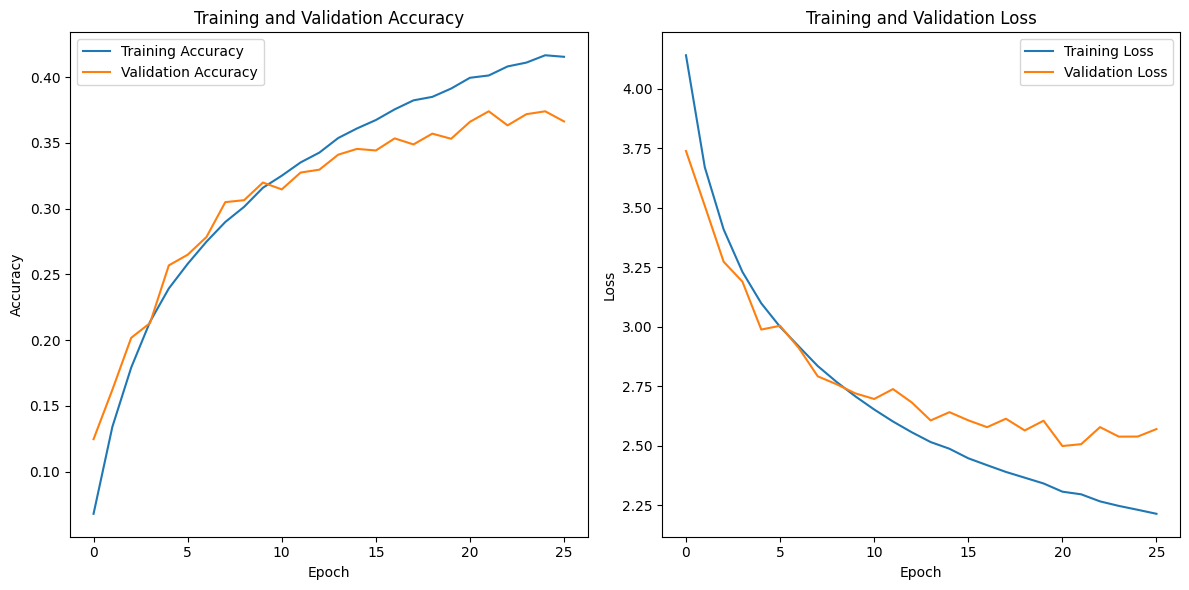

In [43]:
# Define data augmentation
data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Define the convnet model
inputs = layers.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
621/625 [============================>.] - ETA: 0s - loss: 3.6749 - accuracy: 0.1483

625/625 [==============================] - 8s 9ms/step - loss: 3.6722 - accuracy: 0.1488 - val_loss: 3.3533 - val_accuracy: 0.1952 - lr: 0.0010
Epoch 2/100
624/625 [============================>.] - ETA: 0s - loss: 2.9101 - accuracy: 0.2738

625/625 [==============================] - 5s 8ms/step - loss: 2.9103 - accuracy: 0.2739 - val_loss: 2.7989 - val_accuracy: 0.3024 - lr: 0.0010
Epoch 3/100
614/625 [============================>.] - ETA: 0s - loss: 2.5561 - accuracy: 0.3446

625/625 [==============================] - 5s 8ms/step - loss: 2.5568 - accuracy: 0.3442 - val_loss: 2.7410 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 4/100
614/625 [============================>.] - ETA: 0s - loss: 2.3171 - accuracy: 0.3969

625/625 [==============================] - 5s 8ms/step - loss: 2.3157 - accuracy: 0.3970 - val_loss: 2.6142 - val_accuracy: 0.3491 - lr: 0.0010
Epoch 5/100
620/625 [============================>.] - ETA: 0s - loss: 2.1279 - accuracy: 0.4360

625/625 [==============================] - 5s 8ms/step - loss: 2.1276 - accuracy: 0.4362 - val_loss: 2.5964 - val_accuracy: 0.3632 - lr: 0.0010
Epoch 6/100
619/625 [============================>.] - ETA: 0s - loss: 1.9669 - accuracy: 0.4712

625/625 [==============================] - 5s 8ms/step - loss: 1.9671 - accuracy: 0.4712 - val_loss: 2.5316 - val_accuracy: 0.3729 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 3s 6ms/step - loss: 1.8210 - accuracy: 0.5044 - val_loss: 2.5647 - val_accuracy: 0.3786 - lr: 0.0010
Epoch 8/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6949 - accuracy: 0.5331 - val_loss: 2.6552 - val_accuracy: 0.3684 - lr: 0.0010
Epoch 9/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5677 - accuracy: 0.5620 - val_loss: 2.7113 - val_accuracy: 0.3728 - lr: 0.0010
Epoch 10/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4574 - accuracy: 0.5846 - val_loss: 2.8242 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 11/100
313/313 [==============================] - 1s 3ms/step - loss: 2.5110 - accuracy: 0.3731
Test accuracy: 0.37310001254081726


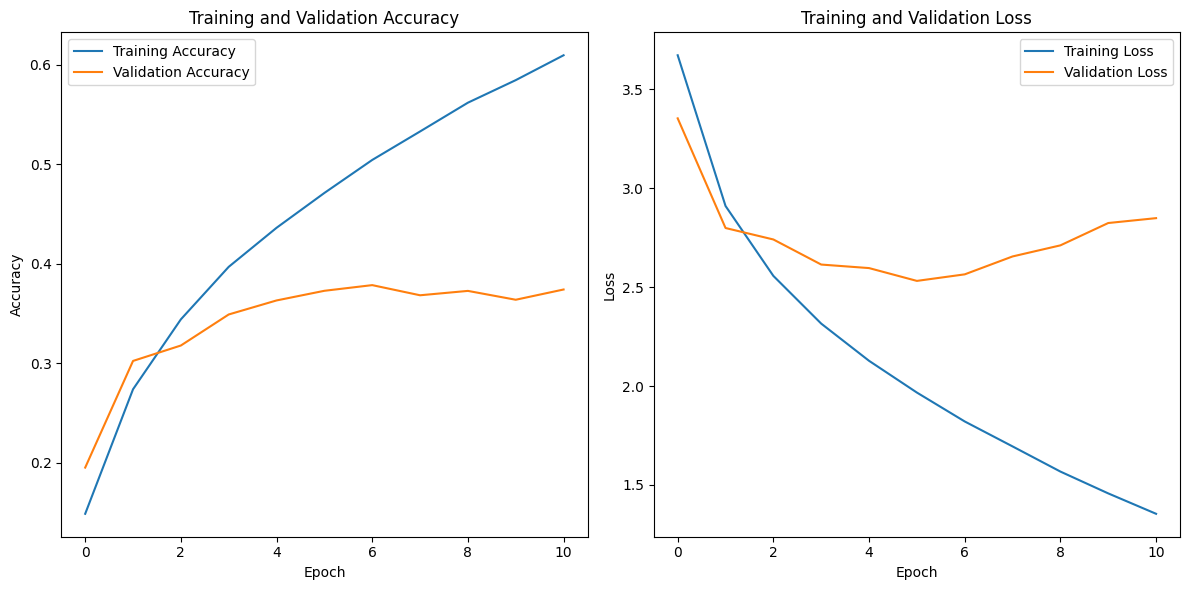

In [44]:
# Define the convnet model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
622/625 [============================>.] - ETA: 0s - loss: 4.3689 - accuracy: 0.0304

625/625 [==============================] - 9s 11ms/step - loss: 4.3681 - accuracy: 0.0304 - val_loss: 4.0769 - val_accuracy: 0.0806 - lr: 0.0010
Epoch 2/100
617/625 [============================>.] - ETA: 0s - loss: 3.9780 - accuracy: 0.0830

625/625 [==============================] - 4s 7ms/step - loss: 3.9755 - accuracy: 0.0834 - val_loss: 3.6471 - val_accuracy: 0.1350 - lr: 0.0010
Epoch 3/100
615/625 [============================>.] - ETA: 0s - loss: 3.6927 - accuracy: 0.1228

625/625 [==============================] - 4s 6ms/step - loss: 3.6911 - accuracy: 0.1233 - val_loss: 3.4281 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 4/100
623/625 [============================>.] - ETA: 0s - loss: 3.5251 - accuracy: 0.1491

625/625 [==============================] - 4s 7ms/step - loss: 3.5242 - accuracy: 0.1491 - val_loss: 3.2560 - val_accuracy: 0.1968 - lr: 0.0010
Epoch 5/100
619/625 [============================>.] - ETA: 0s - loss: 3.3982 - accuracy: 0.1697

625/625 [==============================] - 4s 7ms/step - loss: 3.3975 - accuracy: 0.1698 - val_loss: 3.1338 - val_accuracy: 0.2247 - lr: 0.0010
Epoch 6/100
621/625 [============================>.] - ETA: 0s - loss: 3.2872 - accuracy: 0.1940

625/625 [==============================] - 4s 6ms/step - loss: 3.2867 - accuracy: 0.1942 - val_loss: 3.0336 - val_accuracy: 0.2446 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - ETA: 0s - loss: 3.1933 - accuracy: 0.2090

625/625 [==============================] - 4s 7ms/step - loss: 3.1933 - accuracy: 0.2090 - val_loss: 2.9653 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 8/100
612/625 [============================>.] - ETA: 0s - loss: 3.1248 - accuracy: 0.2214

625/625 [==============================] - 4s 7ms/step - loss: 3.1244 - accuracy: 0.2211 - val_loss: 2.8479 - val_accuracy: 0.2844 - lr: 0.0010
Epoch 9/100
614/625 [============================>.] - ETA: 0s - loss: 3.0491 - accuracy: 0.2365

625/625 [==============================] - 4s 6ms/step - loss: 3.0482 - accuracy: 0.2369 - val_loss: 2.7985 - val_accuracy: 0.2963 - lr: 0.0010
Epoch 10/100
624/625 [============================>.] - ETA: 0s - loss: 2.9947 - accuracy: 0.2456

625/625 [==============================] - 4s 7ms/step - loss: 2.9952 - accuracy: 0.2455 - val_loss: 2.7593 - val_accuracy: 0.2985 - lr: 0.0010
Epoch 11/100
625/625 [==============================] - 3s 5ms/step - loss: 2.9405 - accuracy: 0.2594 - val_loss: 2.7822 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 12/100
621/625 [============================>.] - ETA: 0s - loss: 2.8988 - accuracy: 0.2641

625/625 [==============================] - 4s 6ms/step - loss: 2.9001 - accuracy: 0.2639 - val_loss: 2.6883 - val_accuracy: 0.3130 - lr: 0.0010
Epoch 13/100
619/625 [============================>.] - ETA: 0s - loss: 2.8666 - accuracy: 0.2715

625/625 [==============================] - 4s 6ms/step - loss: 2.8669 - accuracy: 0.2715 - val_loss: 2.6330 - val_accuracy: 0.3238 - lr: 0.0010
Epoch 14/100
619/625 [============================>.] - ETA: 0s - loss: 2.8194 - accuracy: 0.2803

625/625 [==============================] - 4s 7ms/step - loss: 2.8188 - accuracy: 0.2806 - val_loss: 2.6118 - val_accuracy: 0.3270 - lr: 0.0010
Epoch 15/100
625/625 [==============================] - ETA: 0s - loss: 2.7835 - accuracy: 0.2890

625/625 [==============================] - 4s 7ms/step - loss: 2.7835 - accuracy: 0.2890 - val_loss: 2.5802 - val_accuracy: 0.3408 - lr: 0.0010
Epoch 16/100
614/625 [============================>.] - ETA: 0s - loss: 2.7499 - accuracy: 0.2932

625/625 [==============================] - 4s 7ms/step - loss: 2.7509 - accuracy: 0.2931 - val_loss: 2.5713 - val_accuracy: 0.3355 - lr: 0.0010
Epoch 17/100
622/625 [============================>.] - ETA: 0s - loss: 2.7364 - accuracy: 0.2959

625/625 [==============================] - 4s 7ms/step - loss: 2.7364 - accuracy: 0.2958 - val_loss: 2.5583 - val_accuracy: 0.3349 - lr: 0.0010
Epoch 18/100
612/625 [============================>.] - ETA: 0s - loss: 2.7003 - accuracy: 0.3041

625/625 [==============================] - 4s 6ms/step - loss: 2.7015 - accuracy: 0.3040 - val_loss: 2.4913 - val_accuracy: 0.3534 - lr: 0.0010
Epoch 19/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6818 - accuracy: 0.3068 - val_loss: 2.5143 - val_accuracy: 0.3482 - lr: 0.0010
Epoch 20/100
616/625 [============================>.] - ETA: 0s - loss: 2.6646 - accuracy: 0.3100

625/625 [==============================] - 4s 7ms/step - loss: 2.6632 - accuracy: 0.3104 - val_loss: 2.4610 - val_accuracy: 0.3531 - lr: 0.0010
Epoch 21/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6552 - accuracy: 0.3129 - val_loss: 2.4999 - val_accuracy: 0.3563 - lr: 0.0010
Epoch 22/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6118 - accuracy: 0.3218 - val_loss: 2.4856 - val_accuracy: 0.3532 - lr: 0.0010
Epoch 23/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6044 - accuracy: 0.3245 - val_loss: 2.4918 - val_accuracy: 0.3545 - lr: 0.0010
Epoch 24/100
620/625 [============================>.] - ETA: 0s - loss: 2.5943 - accuracy: 0.3251

625/625 [==============================] - 4s 7ms/step - loss: 2.5939 - accuracy: 0.3252 - val_loss: 2.4347 - val_accuracy: 0.3637 - lr: 0.0010
Epoch 25/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5662 - accuracy: 0.3278 - val_loss: 2.4410 - val_accuracy: 0.3626 - lr: 0.0010
Epoch 26/100
625/625 [==============================] - ETA: 0s - loss: 2.5557 - accuracy: 0.3305

625/625 [==============================] - 6s 9ms/step - loss: 2.5557 - accuracy: 0.3305 - val_loss: 2.4248 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 27/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5407 - accuracy: 0.3345 - val_loss: 2.4653 - val_accuracy: 0.3589 - lr: 0.0010
Epoch 28/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5306 - accuracy: 0.3380 - val_loss: 2.4751 - val_accuracy: 0.3582 - lr: 0.0010
Epoch 29/100
619/625 [============================>.] - ETA: 0s - loss: 2.5183 - accuracy: 0.3395

625/625 [==============================] - 4s 7ms/step - loss: 2.5188 - accuracy: 0.3397 - val_loss: 2.3958 - val_accuracy: 0.3701 - lr: 0.0010
Epoch 30/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5005 - accuracy: 0.3439 - val_loss: 2.4117 - val_accuracy: 0.3662 - lr: 0.0010
Epoch 31/100
622/625 [============================>.] - ETA: 0s - loss: 2.4947 - accuracy: 0.3459

625/625 [==============================] - 4s 7ms/step - loss: 2.4947 - accuracy: 0.3459 - val_loss: 2.3920 - val_accuracy: 0.3738 - lr: 0.0010
Epoch 32/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4873 - accuracy: 0.3491 - val_loss: 2.4072 - val_accuracy: 0.3703 - lr: 0.0010
Epoch 33/100
625/625 [==============================] - 3s 4ms/step - loss: 2.4755 - accuracy: 0.3483 - val_loss: 2.4520 - val_accuracy: 0.3591 - lr: 0.0010
Epoch 34/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4663 - accuracy: 0.3502 - val_loss: 2.4050 - val_accuracy: 0.3692 - lr: 0.0010
Epoch 35/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4570 - accuracy: 0.3519 - val_loss: 2.4084 - val_accuracy: 0.3700 - lr: 0.0010
Epoch 36/100
313/313 [==============================] - 1s 3ms/step - loss: 2.3818 - accuracy: 0.3765
Test accuracy: 0.3765000104904175


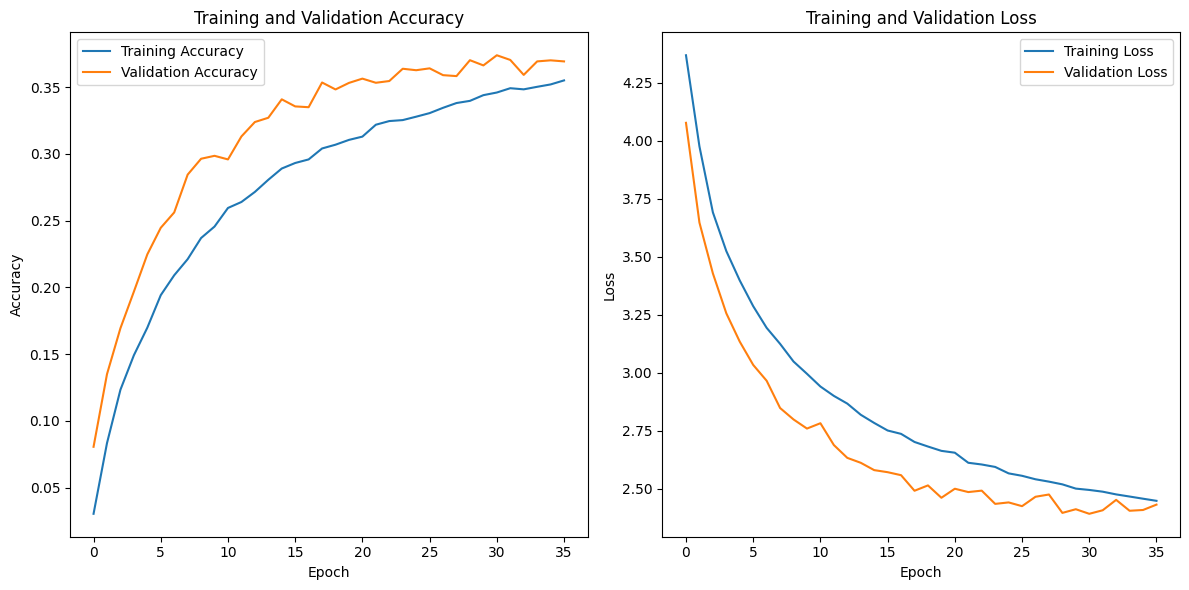

In [46]:
# Define the convnet model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
618/625 [============================>.] - ETA: 0s - loss: 4.3264 - accuracy: 0.0516

625/625 [==============================] - 8s 10ms/step - loss: 4.3230 - accuracy: 0.0518 - val_loss: 3.8626 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 2/100
617/625 [============================>.] - ETA: 0s - loss: 3.8292 - accuracy: 0.1021

625/625 [==============================] - 5s 8ms/step - loss: 3.8273 - accuracy: 0.1025 - val_loss: 3.5278 - val_accuracy: 0.1629 - lr: 0.0010
Epoch 3/100
615/625 [============================>.] - ETA: 0s - loss: 3.6047 - accuracy: 0.1377

625/625 [==============================] - 5s 8ms/step - loss: 3.6023 - accuracy: 0.1376 - val_loss: 3.3459 - val_accuracy: 0.1912 - lr: 0.0010
Epoch 4/100
624/625 [============================>.] - ETA: 0s - loss: 3.4352 - accuracy: 0.1662

625/625 [==============================] - 5s 8ms/step - loss: 3.4351 - accuracy: 0.1662 - val_loss: 3.1020 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 5/100
621/625 [============================>.] - ETA: 0s - loss: 3.3179 - accuracy: 0.1886

625/625 [==============================] - 5s 8ms/step - loss: 3.3187 - accuracy: 0.1885 - val_loss: 3.0494 - val_accuracy: 0.2401 - lr: 0.0010
Epoch 6/100
620/625 [============================>.] - ETA: 0s - loss: 3.2099 - accuracy: 0.2054

625/625 [==============================] - 5s 8ms/step - loss: 3.2088 - accuracy: 0.2057 - val_loss: 2.9338 - val_accuracy: 0.2621 - lr: 0.0010
Epoch 7/100
620/625 [============================>.] - ETA: 0s - loss: 3.1433 - accuracy: 0.2167

625/625 [==============================] - 5s 8ms/step - loss: 3.1441 - accuracy: 0.2164 - val_loss: 2.8647 - val_accuracy: 0.2770 - lr: 0.0010
Epoch 8/100
617/625 [============================>.] - ETA: 0s - loss: 3.0665 - accuracy: 0.2303

625/625 [==============================] - 5s 8ms/step - loss: 3.0667 - accuracy: 0.2304 - val_loss: 2.7969 - val_accuracy: 0.2962 - lr: 0.0010
Epoch 9/100
614/625 [============================>.] - ETA: 0s - loss: 3.0095 - accuracy: 0.2410

625/625 [==============================] - 5s 8ms/step - loss: 3.0088 - accuracy: 0.2410 - val_loss: 2.7478 - val_accuracy: 0.3006 - lr: 0.0010
Epoch 10/100
618/625 [============================>.] - ETA: 0s - loss: 2.9537 - accuracy: 0.2528

625/625 [==============================] - 5s 8ms/step - loss: 2.9533 - accuracy: 0.2528 - val_loss: 2.6912 - val_accuracy: 0.3152 - lr: 0.0010
Epoch 11/100
625/625 [==============================] - 3s 5ms/step - loss: 2.9100 - accuracy: 0.2608 - val_loss: 2.6981 - val_accuracy: 0.3110 - lr: 0.0010
Epoch 12/100
621/625 [============================>.] - ETA: 0s - loss: 2.8712 - accuracy: 0.2681

625/625 [==============================] - 5s 8ms/step - loss: 2.8706 - accuracy: 0.2682 - val_loss: 2.6342 - val_accuracy: 0.3135 - lr: 0.0010
Epoch 13/100
620/625 [============================>.] - ETA: 0s - loss: 2.8325 - accuracy: 0.2752

625/625 [==============================] - 5s 8ms/step - loss: 2.8322 - accuracy: 0.2754 - val_loss: 2.6009 - val_accuracy: 0.3289 - lr: 0.0010
Epoch 14/100
618/625 [============================>.] - ETA: 0s - loss: 2.7951 - accuracy: 0.2822

625/625 [==============================] - 8s 12ms/step - loss: 2.7943 - accuracy: 0.2822 - val_loss: 2.5764 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 15/100
616/625 [============================>.] - ETA: 0s - loss: 2.7604 - accuracy: 0.2875

625/625 [==============================] - 5s 8ms/step - loss: 2.7594 - accuracy: 0.2873 - val_loss: 2.5226 - val_accuracy: 0.3548 - lr: 0.0010
Epoch 16/100
619/625 [============================>.] - ETA: 0s - loss: 2.7293 - accuracy: 0.2973

625/625 [==============================] - 5s 8ms/step - loss: 2.7306 - accuracy: 0.2968 - val_loss: 2.4900 - val_accuracy: 0.3494 - lr: 0.0010
Epoch 17/100
624/625 [============================>.] - ETA: 0s - loss: 2.7175 - accuracy: 0.2979

625/625 [==============================] - 5s 8ms/step - loss: 2.7177 - accuracy: 0.2978 - val_loss: 2.4895 - val_accuracy: 0.3560 - lr: 0.0010
Epoch 18/100
625/625 [==============================] - 4s 6ms/step - loss: 2.6841 - accuracy: 0.3052 - val_loss: 2.4925 - val_accuracy: 0.3539 - lr: 0.0010
Epoch 19/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6546 - accuracy: 0.3063 - val_loss: 2.4986 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 20/100
614/625 [============================>.] - ETA: 0s - loss: 2.6328 - accuracy: 0.3139

625/625 [==============================] - 5s 8ms/step - loss: 2.6342 - accuracy: 0.3139 - val_loss: 2.4657 - val_accuracy: 0.3575 - lr: 0.0010
Epoch 21/100
625/625 [==============================] - 3s 5ms/step - loss: 2.6034 - accuracy: 0.3223 - val_loss: 2.4658 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 22/100
623/625 [============================>.] - ETA: 0s - loss: 2.5852 - accuracy: 0.3216

625/625 [==============================] - 5s 8ms/step - loss: 2.5848 - accuracy: 0.3217 - val_loss: 2.4457 - val_accuracy: 0.3627 - lr: 0.0010
Epoch 23/100
618/625 [============================>.] - ETA: 0s - loss: 2.5638 - accuracy: 0.3268

625/625 [==============================] - 5s 8ms/step - loss: 2.5630 - accuracy: 0.3269 - val_loss: 2.4023 - val_accuracy: 0.3719 - lr: 0.0010
Epoch 24/100
625/625 [==============================] - 3s 6ms/step - loss: 2.5401 - accuracy: 0.3296 - val_loss: 2.4828 - val_accuracy: 0.3591 - lr: 0.0010
Epoch 25/100
616/625 [============================>.] - ETA: 0s - loss: 2.5274 - accuracy: 0.3319

625/625 [==============================] - 5s 8ms/step - loss: 2.5277 - accuracy: 0.3320 - val_loss: 2.3718 - val_accuracy: 0.3802 - lr: 0.0010
Epoch 26/100
625/625 [==============================] - ETA: 0s - loss: 2.5125 - accuracy: 0.3379

625/625 [==============================] - 5s 8ms/step - loss: 2.5125 - accuracy: 0.3379 - val_loss: 2.3556 - val_accuracy: 0.3837 - lr: 0.0010
Epoch 27/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4889 - accuracy: 0.3422 - val_loss: 2.3812 - val_accuracy: 0.3785 - lr: 0.0010
Epoch 28/100
624/625 [============================>.] - ETA: 0s - loss: 2.4826 - accuracy: 0.3431

625/625 [==============================] - 5s 8ms/step - loss: 2.4827 - accuracy: 0.3431 - val_loss: 2.3384 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 29/100
618/625 [============================>.] - ETA: 0s - loss: 2.4490 - accuracy: 0.3511

625/625 [==============================] - 5s 8ms/step - loss: 2.4496 - accuracy: 0.3509 - val_loss: 2.3300 - val_accuracy: 0.3843 - lr: 0.0010
Epoch 30/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4384 - accuracy: 0.3509 - val_loss: 2.3538 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 31/100
625/625 [==============================] - 3s 5ms/step - loss: 2.4301 - accuracy: 0.3564 - val_loss: 2.4107 - val_accuracy: 0.3791 - lr: 0.0010
Epoch 32/100
620/625 [============================>.] - ETA: 0s - loss: 2.4129 - accuracy: 0.3573

625/625 [==============================] - 5s 8ms/step - loss: 2.4142 - accuracy: 0.3573 - val_loss: 2.3004 - val_accuracy: 0.3941 - lr: 0.0010
Epoch 33/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3949 - accuracy: 0.3644 - val_loss: 2.3145 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 34/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3964 - accuracy: 0.3620 - val_loss: 2.3116 - val_accuracy: 0.3960 - lr: 0.0010
Epoch 35/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3797 - accuracy: 0.3672 - val_loss: 2.3280 - val_accuracy: 0.3861 - lr: 0.0010
Epoch 36/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3692 - accuracy: 0.3653 - val_loss: 2.3141 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 37/100
313/313 [==============================] - 1s 3ms/step - loss: 2.2955 - accuracy: 0.3995
Test accuracy: 0.3995000123977661


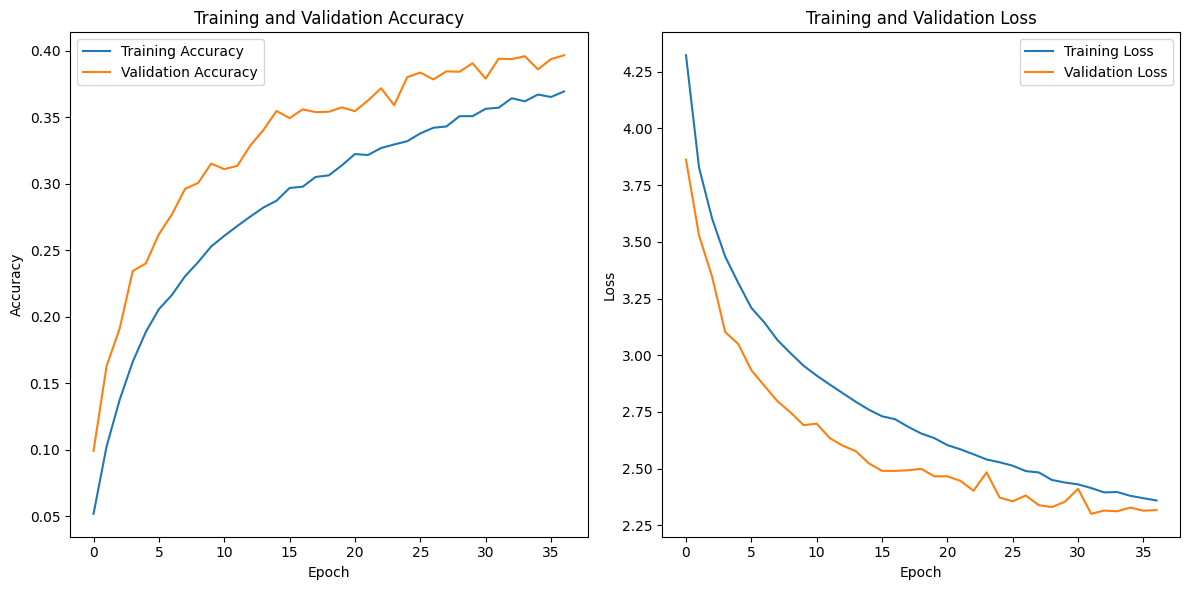

In [47]:
# Define the convnet model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
614/625 [============================>.] - ETA: 0s - loss: 3.9299 - accuracy: 0.1052

625/625 [==============================] - 8s 9ms/step - loss: 3.9232 - accuracy: 0.1062 - val_loss: 3.5015 - val_accuracy: 0.1630 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 3.2784 - accuracy: 0.2001

625/625 [==============================] - 5s 8ms/step - loss: 3.2784 - accuracy: 0.2001 - val_loss: 3.0344 - val_accuracy: 0.2481 - lr: 0.0010
Epoch 3/100
616/625 [============================>.] - ETA: 0s - loss: 2.9884 - accuracy: 0.2571

625/625 [==============================] - 5s 8ms/step - loss: 2.9882 - accuracy: 0.2573 - val_loss: 2.8412 - val_accuracy: 0.2861 - lr: 0.0010
Epoch 4/100
620/625 [============================>.] - ETA: 0s - loss: 2.8003 - accuracy: 0.2890

625/625 [==============================] - 8s 13ms/step - loss: 2.8009 - accuracy: 0.2891 - val_loss: 2.6721 - val_accuracy: 0.3207 - lr: 0.0010
Epoch 5/100
621/625 [============================>.] - ETA: 0s - loss: 2.6649 - accuracy: 0.3178

625/625 [==============================] - 5s 8ms/step - loss: 2.6637 - accuracy: 0.3180 - val_loss: 2.5743 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 6/100
616/625 [============================>.] - ETA: 0s - loss: 2.5505 - accuracy: 0.3423

625/625 [==============================] - 5s 8ms/step - loss: 2.5511 - accuracy: 0.3424 - val_loss: 2.5659 - val_accuracy: 0.3479 - lr: 0.0010
Epoch 7/100
624/625 [============================>.] - ETA: 0s - loss: 2.4523 - accuracy: 0.3646

625/625 [==============================] - 5s 8ms/step - loss: 2.4530 - accuracy: 0.3644 - val_loss: 2.4674 - val_accuracy: 0.3604 - lr: 0.0010
Epoch 8/100
625/625 [==============================] - 3s 5ms/step - loss: 2.3845 - accuracy: 0.3753 - val_loss: 2.5023 - val_accuracy: 0.3555 - lr: 0.0010
Epoch 9/100
619/625 [============================>.] - ETA: 0s - loss: 2.2976 - accuracy: 0.3912

625/625 [==============================] - 5s 8ms/step - loss: 2.2974 - accuracy: 0.3915 - val_loss: 2.4510 - val_accuracy: 0.3751 - lr: 0.0010
Epoch 10/100
618/625 [============================>.] - ETA: 0s - loss: 2.2518 - accuracy: 0.4027

625/625 [==============================] - 5s 8ms/step - loss: 2.2527 - accuracy: 0.4029 - val_loss: 2.4109 - val_accuracy: 0.3778 - lr: 0.0010
Epoch 11/100
617/625 [============================>.] - ETA: 0s - loss: 2.1899 - accuracy: 0.4149

625/625 [==============================] - 5s 8ms/step - loss: 2.1907 - accuracy: 0.4148 - val_loss: 2.3529 - val_accuracy: 0.3963 - lr: 0.0010
Epoch 12/100
625/625 [==============================] - 3s 5ms/step - loss: 2.1301 - accuracy: 0.4274 - val_loss: 2.3795 - val_accuracy: 0.3927 - lr: 0.0010
Epoch 13/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0871 - accuracy: 0.4365 - val_loss: 2.4122 - val_accuracy: 0.3918 - lr: 0.0010
Epoch 14/100
616/625 [============================>.] - ETA: 0s - loss: 2.0412 - accuracy: 0.4449

625/625 [==============================] - 5s 8ms/step - loss: 2.0417 - accuracy: 0.4451 - val_loss: 2.3126 - val_accuracy: 0.4031 - lr: 0.0010
Epoch 15/100
620/625 [============================>.] - ETA: 0s - loss: 2.0038 - accuracy: 0.4561

625/625 [==============================] - 5s 8ms/step - loss: 2.0041 - accuracy: 0.4559 - val_loss: 2.2935 - val_accuracy: 0.4095 - lr: 0.0010
Epoch 16/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9640 - accuracy: 0.4627 - val_loss: 2.3524 - val_accuracy: 0.4039 - lr: 0.0010
Epoch 17/100
625/625 [==============================] - 4s 6ms/step - loss: 1.9203 - accuracy: 0.4719 - val_loss: 2.3370 - val_accuracy: 0.4043 - lr: 0.0010
Epoch 18/100
617/625 [============================>.] - ETA: 0s - loss: 1.9061 - accuracy: 0.4784

625/625 [==============================] - 5s 8ms/step - loss: 1.9063 - accuracy: 0.4785 - val_loss: 2.2933 - val_accuracy: 0.4208 - lr: 0.0010
Epoch 19/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8548 - accuracy: 0.4909 - val_loss: 2.3124 - val_accuracy: 0.4114 - lr: 0.0010
Epoch 20/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8263 - accuracy: 0.4949 - val_loss: 2.3455 - val_accuracy: 0.4066 - lr: 0.0010
Epoch 21/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8091 - accuracy: 0.4955 - val_loss: 2.3470 - val_accuracy: 0.4069 - lr: 0.0010
Epoch 22/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7752 - accuracy: 0.5049 - val_loss: 2.3109 - val_accuracy: 0.4106 - lr: 0.0010
Epoch 23/100
313/313 [==============================] - 1s 3ms/step - loss: 2.3064 - accuracy: 0.4122
Test accuracy: 0.412200003862381


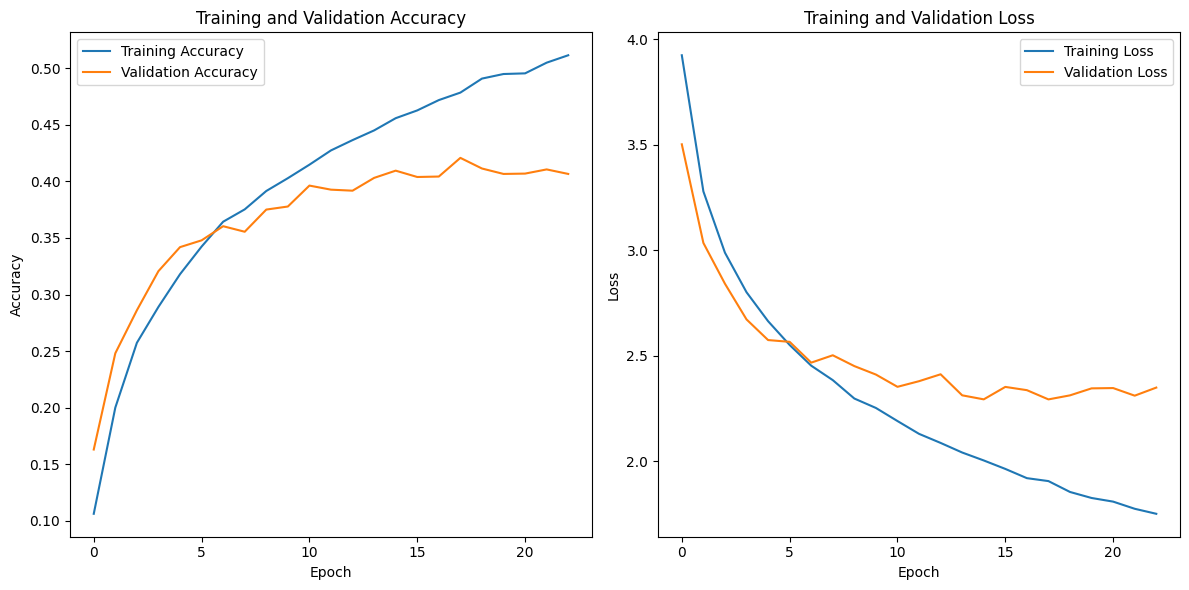

In [48]:
# Define the convnet model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("from_scratch_models", save_best_only=True, monitor="val_loss")
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor="val_loss")

# Train the model with your data
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping, lr_scheduler])


# Evaluate the model on the test data
model = keras.models.load_model("from_scratch_models")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
